# Retail Pulse: From Raw Data to Smart Decisions

This project simulates a complete data analysis workflow in a retail environment. It starts by generating synthetic data for key business areas like products, customers, stores, employees, sales, and returns. The goal is to extract, transform, and enrich this data using SQL and Python to uncover insights that help understand customer behavior, sales performance, and operational trends.

Once the data is ready, it’s exported and visualized in Power BI using a star schema model. This setup allows for clear, interactive dashboards that support decision-making in areas like marketing, inventory, and regional performance. The whole project is designed to practice end-to-end data analysis skills and showcase them in a professional portfolio.

# Extraction and Transformation

## 🧬 Synthetic Data Generation with Python

To simulate a realistic business environment, synthetic datasets were generated using Python and the Faker library. The data includes products, customers, stores, employees, sales, returns, campaigns, and a date dimension table. Each dataset was carefully crafted to reflect real-world structures and relationships, ensuring that the subsequent analysis and visualizations are both meaningful and representative of common business scenarios.


In [1]:
!pip install faker

import pandas as pd
import numpy as np
from faker import Faker
import random
from datetime import datetime, timedelta

# Inicialización
fake = Faker()
Faker.seed(42)
np.random.seed(42)
random.seed(42)

# Fechas límite comunes
start_date_2022 = datetime(2022, 1, 1).date()
end_date_2024 = datetime(2024, 12, 31).date()

# -------------------------------------------
# 1. PRODUCTS TABLE
# -------------------------------------------
categories = ['Home', 'Electronics', 'Clothing', 'Books', 'Toys', 'Sports']
subcategories = {
    'Home': ['Furniture', 'Kitchen', 'Decor'],
    'Electronics': ['Mobile', 'Laptop', 'Audio'],
    'Clothing': ['Men', 'Women', 'Kids'],
    'Books': ['Fiction', 'Non-Fiction', 'Comics'],
    'Toys': ['Puzzles', 'Action Figures', 'Dolls'],
    'Sports': ['Fitness', 'Outdoor', 'Team Sports']
}

products = []
for i in range(1, 101):
    cat = random.choice(categories)
    subcat = random.choice(subcategories[cat])
    cost = round(random.uniform(5, 200), 2)
    base_price = round(cost * random.uniform(1.2, 2.0), 2)
    stock = random.randint(10, 500)
    products.append([i, f"{fake.word().capitalize()} {subcat}", cat, subcat, cost, base_price, stock])

df_products = pd.DataFrame(products, columns=[
    'product_id', 'product_name', 'category', 'subcategory', 'cost', 'base_price', 'stock'
])
df_products.to_csv("products.csv", index=False)

# -------------------------------------------
# 2. CUSTOMERS TABLE
# -------------------------------------------
# Cities per country
country_city_map = {
    'USA': ['New York', 'Los Angeles', 'Chicago', 'Houston', 'Phoenix'],
    'Canada': ['Toronto', 'Vancouver', 'Montreal', 'Calgary', 'Ottawa'],
    'Mexico': ['Mexico City', 'Guadalajara', 'Monterrey', 'Puebla', 'Tijuana'],
    'Colombia': ['Bogotá', 'Medellín', 'Cali', 'Barranquilla', 'Cartagena'],
    'Peru': ['Lima', 'Arequipa', 'Cusco', 'Trujillo', 'Piura'],
    'Chile': ['Santiago', 'Valparaíso', 'Concepción', 'Antofagasta'],
    'Argentina': ['Buenos Aires', 'Córdoba', 'Rosario', 'Mendoza', 'La Plata'],
    'Brazil': ['São Paulo', 'Rio de Janeiro', 'Brasília', 'Salvador', 'Belo Horizonte']
}

# Agrupaciones
usa = ['USA']
canada = ['Canada']
latam = ['Mexico', 'Colombia', 'Peru', 'Chile', 'Argentina', 'Brazil']

# Quantity and distribution
total_customers = 2000
usa_count = int(total_customers * 0.4)       # 800
canada_count = int(total_customers * 0.1)    # 200
latam_count = total_customers - usa_count - canada_count  # 1000

customers = []
customer_id = 1

def generate_customers(region_list, count):
    global customer_id
    for _ in range(count):
        country = random.choice(region_list)
        city = random.choice(country_city_map[country])
        birth = fake.date_of_birth(minimum_age=18, maximum_age=70)
        signup = fake.date_between(start_date=start_date_2022, end_date=end_date_2024)
        income_level = random.choices(['low', 'medium', 'high'], weights=[0.3, 0.5, 0.2])[0]
        customers.append([
            customer_id, fake.first_name(), fake.last_name(), random.choice(['M', 'F']),
            birth, signup, city, country, income_level
        ])
        customer_id += 1

# Generation per Region
generate_customers(usa, usa_count)
generate_customers(canada, canada_count)
generate_customers(latam, latam_count)

df_customers = pd.DataFrame(customers, columns=[
    'customer_id', 'first_name', 'last_name', 'gender',
    'birth_date', 'signup_date', 'city', 'country', 'income_level'
])
df_customers.to_csv("customers.csv", index=False)

# -------------------------------------------
# 3. STORES TABLE (Distribución geográfica personalizada)
# -------------------------------------------

store_types = ['physical', 'online']

# Regiones y sus ciudades asociadas
region_city_map = {
    'USA': ['New York', 'Los Angeles', 'Chicago', 'Houston', 'Phoenix'],
    'Canada': ['Toronto', 'Vancouver', 'Montreal', 'Calgary', 'Ottawa'],
    'Mexico': ['Mexico City', 'Guadalajara', 'Monterrey'],
    'Colombia': ['Bogotá', 'Medellín', 'Cali'],
    'Peru': ['Lima', 'Arequipa', 'Cusco'],
    'Chile': ['Santiago', 'Valparaíso', 'Concepción'],
    'Argentina': ['Buenos Aires', 'Córdoba', 'Rosario'],
    'Brazil': ['São Paulo', 'Rio de Janeiro', 'Brasília']
}

# Definimos las regiones agrupadas
usa_region = ['USA']
canada_region = ['Canada']
latam_regions = ['Mexico', 'Colombia', 'Peru', 'Chile', 'Argentina', 'Brazil']

# Cantidades por bloque
total_stores = 100
usa_count = int(total_stores * 0.5)      # 50 tiendas
canada_count = int(total_stores * 0.2)   # 20 tiendas
latam_count = total_stores - usa_count - canada_count  # 30 tiendas

stores = []
store_id = 1

def generate_stores(region_group, region_list, count):
    global store_id
    for _ in range(count):
        region = random.choice(region_list)
        city = random.choice(region_city_map[region])
        stores.append([
            store_id, f"Store {store_id}", random.choice(store_types),
            region, city
        ])
        store_id += 1

# Generamos tiendas por grupo
generate_stores('USA', usa_region, usa_count)
generate_stores('Canada', canada_region, canada_count)
generate_stores('LatAm', latam_regions, latam_count)

# DataFrame final
df_stores = pd.DataFrame(stores, columns=[
    'store_id', 'store_name', 'store_type', 'region', 'city'
])
df_stores.to_csv("stores.csv", index=False)

# -------------------------------------------
# 4. EMPLOYEES TABLE
# -------------------------------------------
positions = ['Sales Rep', 'Manager', 'Cashier']

employees = []
for i in range(1, 151):
    employees.append([
        i, fake.name(), fake.date_between(start_date=datetime(2018,1,1).date(), end_date=end_date_2024),
        random.choice(positions), random.randint(1, 100)
    ])

df_employees = pd.DataFrame(employees, columns=[
    'employee_id', 'full_name', 'hire_date', 'position', 'store_id'
])
df_employees.to_csv("employees.csv", index=False)

# -------------------------------------------
# 5. CAMPAIGNS TABLE
# -------------------------------------------
channels = ['Email', 'Social Media', 'TV', 'Radio', 'In-store']

campaigns = []
for i in range(1, 51):
    start = fake.date_between(start_date=datetime(2022,1,1).date(), end_date=end_date_2024 - timedelta(days=90))
    end = start + timedelta(days=random.randint(10, 90))
    campaigns.append([
        i, f"Campaign {i}", random.choice(channels),
        start, end, round(random.uniform(1000, 10000), 2)
    ])

df_campaigns = pd.DataFrame(campaigns, columns=[
    'campaign_id', 'campaign_name', 'channel', 'start_date', 'end_date', 'budget'
])
df_campaigns.to_csv("campaigns.csv", index=False)

# -------------------------------------------
# 6. SALES TABLE
# -------------------------------------------
sales = []
for i in range(1, 20001):
    sale_date = fake.date_between(start_date=start_date_2022, end_date=end_date_2024)
    quantity = random.randint(1, 5)
    product = df_products.sample(1).iloc[0]
    unit_price = round(product['base_price'] * random.uniform(0.9, 1.1), 2)
    discount = round(random.choice([0, 0.05, 0.1, 0.15]), 2)
    sales.append([
        i,
        random.randint(1, 2000),  # customer_id
        product['product_id'],
        random.randint(1, 100),    # store_id
        random.randint(1, 150),   # employee_id
        random.randint(1, 50),    # campaign_id
        sale_date,
        quantity,
        unit_price,
        discount,
        random.choices(['credit_card', 'cash', 'paypal', 'bank_transfer'], weights=[0.5, 0.25, 0.15, 0.1])[0]
    ])

df_sales = pd.DataFrame(sales, columns=[
    'sale_id', 'customer_id', 'product_id', 'store_id',
    'employee_id', 'campaign_id', 'sale_date',
    'quantity', 'unit_price', 'discount', 'payment_method'
])
df_sales.to_csv("sales.csv", index=False)

# -------------------------------------------
# 7. RETURNS TABLE
# -------------------------------------------
returns = []
returned_sales = df_sales.sample(frac=0.075, random_state=42)

for idx, row in returned_sales.iterrows():
    reason = random.choice(['defective', 'wrong size', 'changed mind', 'late delivery'])
    refund = round(row['unit_price'] * row['quantity'] * (1 - row['discount']), 2)
    return_date = pd.to_datetime(row['sale_date']) + timedelta(days=random.randint(1, 30))
    returns.append([
        idx + 1, row['sale_id'], return_date.date(), reason, refund
    ])

df_returns = pd.DataFrame(returns, columns=[
    'return_id', 'sale_id', 'return_date', 'return_reason', 'refund_amount'
])
df_returns.to_csv("returns.csv", index=False)

# -------------------------------------------
# 8. DATES TABLE (actualizado para generar solo la columna "date")
# -------------------------------------------
date_range = pd.date_range(start='2022-01-01', end='2024-12-31')
df_dates = pd.DataFrame({
    'date': date_range
})
df_dates.to_csv("dates.csv", index=False)

print("✅ df_dates generated with only the 'date' column.")
print("✅ All CSVs generated and saved successfully!")



[notice] A new release of pip is available: 23.0.1 -> 25.0.1
[notice] To update, run: pip install --upgrade pip
✅ df_dates generated with only the 'date' column.
✅ All CSVs generated and saved successfully!


## 🛠️ Data Extraction and Transformation with SQL

The project begins with the extraction of raw data and its transformation using SQL. This stage focuses on cleaning, enriching, and structuring the data to prepare it for analysis. Using SQL window functions, conditional logic, and calculated fields, each table is transformed to reveal key metrics and business-relevant attributes. These curated datasets will serve as the foundation for further exploration in Python and visualization in Power BI.


### Campaigns

In [2]:
campaigns = _dntk.execute_sql(
  'SELECT *\n,SUM(budget) OVER(PARTITION BY channel) AS channel_total_budget -- Adds column with total budget per channel\n,COUNT(campaign_id) OVER(PARTITION BY channel) AS channel_campaigns_count -- Adds column with total number of campaigns per channel\n,SUM(budget) OVER() AS total_budget -- calculates total budget for all campaigns\n,ROUND(budget / SUM(budget) OVER() * 100,2) AS global_budget_perc -- calculates % of every campaign\'s budget vs total budget\n,DENSE_RANK() OVER(PARTITION BY channel ORDER BY budget DESC) AS ranking_per_channel -- adds ranking of budget per channel\n,end_date - start_date AS duration_days -- calcultaes duration in days for every campaign\nFROM df_campaigns',
  'SQL_DEEPNOTE_DATAFRAME_SQL',
  audit_sql_comment='',
  sql_cache_mode='cache_disabled',
  return_variable_type='dataframe'
)
campaigns

,campaign_id,campaign_name,channel,start_date,end_date,budget,channel_total_budget,channel_campaigns_count,total_budget,global_budget_perc,ranking_per_channel,duration_days
0,31,Campaign 31,Social Media,2022-08-14,2022-09-08,9691.13,80754.39,14,291684.3,3.32,1,25
1,11,Campaign 11,Social Media,2022-03-17,2022-05-20,9333.87,80754.39,14,291684.3,3.20,2,64
2,32,Campaign 32,Social Media,2023-06-21,2023-07-16,8758.03,80754.39,14,291684.3,3.00,3,25
3,7,Campaign 7,Social Media,2024-03-29,2024-05-04,8239.23,80754.39,14,291684.3,2.82,4,36
4,35,Campaign 35,Social Media,2024-08-04,2024-10-26,6873.76,80754.39,14,291684.3,2.36,5,83
5,48,Campaign 48,Social Media,2024-08-09,2024-09-15,6419.30,80754.39,14,291684.3,2.20,6,37
6,42,Campaign 42,Social Media,2022-07-31,2022-10-05,6193.64,80754.39,14,291684.3,2.12,7,66
7,5,Campaign 5,Social Media,2024-09-04,2024-11-26,4976.95,80754.39,14,291684.3,1.71,8,83
8,39,Campaign 39,Social Media,2022-02-21,2022-05-11,4807.46,80754.39,14,291684.3,1.65,9,79
9,27,Campaign 27,Social Media,2024-05-06,2024-07-23,4647.97,80754.39,14,291684.3,1.59,10,78


In [3]:
# ```sql
campaigns_doc = _dntk.execute_sql(
    '''
    SELECT *
    ,SUM(budget) OVER(PARTITION BY channel) AS channel_total_budget -- Adds column with total budget per channel
    ,COUNT(campaign_id) OVER(PARTITION BY channel) AS channel_campaigns_count -- Adds column with total number of campaigns per channel
    ,SUM(budget) OVER() AS total_budget -- calculates total budget for all campaigns
    ,ROUND(budget / SUM(budget) OVER() * 100,2) AS global_budget_perc -- calculates % of every campaign's budget vs total budget
    ,DENSE_RANK() OVER(PARTITION BY channel ORDER BY budget DESC) AS ranking_per_channel -- adds ranking of budget per channel
    ,end_date - start_date AS duration_days -- calcultaes duration in days for every campaign
    FROM df_campaigns
    ''',
    'SQL_DEEPNOTE_DATAFRAME_SQL',
    audit_sql_comment='',
    sql_cache_mode='cache_disabled',
    return_variable_type='dataframe'
)
# ```

### Sales

In [4]:
sales = _dntk.execute_sql(
  'WITH s AS (\n\nSELECT *\n,ROUND((quantity * unit_price) * (1 - discount),2) AS total_revenue -- calculates total revenue\n,ROUND(unit_price * (1 - discount),2) AS unit_price_after_discount -- calculates unit price minus discount\n,COUNT(payment_method) OVER(PARTITION BY payment_method) AS method_usage_count -- calculates number of times every payment method is used\n,COUNT(customer_id) OVER(PARTITION BY customer_id) AS customer_purchase_count -- calculates number of purchases made by every customer\n,FIRST(sale_date) OVER(PARTITION BY customer_id ORDER BY sale_date ASC) AS date_first_purchase -- brings date of first purchase of every customer\n,ROW_NUMBER() OVER(PARTITION BY customer_id ORDER BY sale_date ASC) AS purchase_secuence_customer -- ranks number of purchases pero ascending date\n,LAG(sale_date) OVER(PARTITION BY customer_id ORDER BY sale_date ASC) AS date_previous_purchase_customer -- brign prevous sale date for every customer\nFROM df_sales\n\n)\n\nSELECT *\n,DATEDIFF(\'day\', date_first_purchase, sale_date) AS days_since_first_purchase -- calculates number of days of every new purchase since the first purchase, for every customer \n,DATEDIFF(\'day\', date_first_purchase, CAST(\'2024-12-31\' AS DATE)) days_since_first_purchase_last_2024 -- calculates days since first purchase to current date\n,CASE \n    WHEN DATEDIFF(\'day\', date_first_purchase, CAST(\'2024-12-31\' AS DATE)) < 700 THEN \'New\'\n    WHEN DATEDIFF(\'day\', date_first_purchase, CAST(\'2024-12-31\' AS DATE)) >= 700 AND DATEDIFF(\'day\', date_first_purchase, CAST(\'2024-12-31\' AS DATE))  < 830 THEN \'Recent\'\n    WHEN DATEDIFF(\'day\', date_first_purchase, CAST(\'2024-12-31\' AS DATE)) >= 830 AND DATEDIFF(\'day\', date_first_purchase, CAST(\'2024-12-31\' AS DATE))  < 1000 THEN \'Loyal\'\n    ELSE \'Elite\' END AS customer_loyal_group -- Categorizes type of customer according to time since first purchase\n,ROUND(SUM(total_revenue) OVER(PARTITION BY customer_id ORDER BY sale_date ASC),2) AS cumulative_revenue_per_customer -- calculates cumulative total spent per customer\n,DATEDIFF(\'day\', date_previous_purchase_customer,sale_date) AS days_between_purchases -- calculates diff in days since last purchase for every customer\nFROM s',
  'SQL_DEEPNOTE_DATAFRAME_SQL',
  audit_sql_comment='',
  sql_cache_mode='cache_disabled',
  return_variable_type='dataframe'
)
sales

,sale_id,customer_id,product_id,store_id,employee_id,campaign_id,sale_date,quantity,unit_price,discount,...,method_usage_count,customer_purchase_count,date_first_purchase,purchase_secuence_customer,date_previous_purchase_customer,days_since_first_purchase,days_since_first_purchase_last_2024,customer_loyal_group,cumulative_revenue_per_customer,days_between_purchases
0,7611,11,45,9,105,22,2022-01-28,2,63.10,0.05,...,5034,13,2022-01-28,1,NaT,0,1068,Elite,119.89,NaN
1,5004,11,81,10,71,25,2022-03-22,1,46.05,0.10,...,5034,13,2022-01-28,2,2022-01-28,53,1068,Elite,161.34,53.0
2,6526,11,12,88,12,1,2022-06-07,1,332.08,0.15,...,10042,13,2022-01-28,3,2022-03-22,130,1068,Elite,443.61,77.0
3,19218,11,42,3,121,17,2022-08-02,1,148.05,0.10,...,5034,13,2022-01-28,4,2022-06-07,186,1068,Elite,576.86,56.0
4,19699,11,64,8,49,25,2023-10-22,4,100.84,0.00,...,10042,13,2022-01-28,5,2022-08-02,632,1068,Elite,980.22,446.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19995,666,1988,15,63,146,23,2023-10-06,2,219.33,0.00,...,2953,11,2022-05-06,7,2023-09-01,518,970,Loyal,2521.28,35.0
19996,17071,1988,78,72,82,7,2023-11-06,2,168.87,0.10,...,2953,11,2022-05-06,8,2023-10-06,549,970,Loyal,2825.25,31.0
19997,19156,1988,12,52,24,42,2024-01-04,1,289.89,0.10,...,10042,11,2022-05-06,9,2023-11-06,608,970,Loyal,3086.15,59.0
19998,10186,1988,85,95,16,5,2024-07-02,1,17.36,0.05,...,10042,11,2022-05-06,10,2024-01-04,788,970,Loyal,3102.64,180.0


In [5]:
# ```sql
sales_doc = _dntk.execute_sql(
    '''
    WITH s AS (

    SELECT *
    ,ROUND((quantity * unit_price) * (1 - discount),2) AS total_revenue -- calculates total revenue
    ,ROUND(unit_price * (1 - discount),2) AS unit_price_after_discount -- calculates unit price minus discount
    ,COUNT(payment_method) OVER(PARTITION BY payment_method) AS method_usage_count -- calculates number of times every payment method is used
    ,COUNT(customer_id) OVER(PARTITION BY customer_id) AS customer_purchase_count -- calculates number of purchases made by every customer
    ,FIRST(sale_date) OVER(PARTITION BY customer_id ORDER BY sale_date ASC) AS date_first_purchase -- brings date of first purchase of every customer
    ,ROW_NUMBER() OVER(PARTITION BY customer_id ORDER BY sale_date ASC) AS purchase_secuence_customer -- ranks number of purchases pero ascending date
    ,LAG(sale_date) OVER(PARTITION BY customer_id ORDER BY sale_date ASC) AS date_previous_purchase_customer -- brign prevous sale date for every customer
    FROM df_sales

    )

    SELECT *
    ,DATEDIFF('day', date_first_purchase, sale_date) AS days_since_first_purchase -- calculates number of days of every new purchase since the first purchase, for every customer 
    ,DATEDIFF('day', date_first_purchase, CAST('2024-12-31' AS DATE)) days_since_first_purchase_last_2024 -- calculates days since first purchase to current date
    ,CASE 
        WHEN DATEDIFF('day', date_first_purchase, CAST('2024-12-31' AS DATE)) < 700 THEN 'New'
        WHEN DATEDIFF('day', date_first_purchase, CAST('2024-12-31' AS DATE)) >= 700 AND DATEDIFF('day', date_first_purchase, CAST('2024-12-31' AS DATE))  < 830 THEN 'Recent'
        WHEN DATEDIFF('day', date_first_purchase, CAST('2024-12-31' AS DATE)) >= 830 AND DATEDIFF('day', date_first_purchase, CAST('2024-12-31' AS DATE))  < 1000 THEN 'Loyal'
        ELSE 'Elite' END AS customer_loyal_group -- Categorizes type of customer according to time since first purchase
    ,ROUND(SUM(total_revenue) OVER(PARTITION BY customer_id ORDER BY sale_date ASC),2) AS cumulative_revenue_per_customer -- calculates cumulative total spent per customer
    ,DATEDIFF('day', date_previous_purchase_customer,sale_date) AS days_between_purchases -- calculates diff in days since last purchase for every customer
    FROM s
    ''',
    'SQL_DEEPNOTE_DATAFRAME_SQL',
    audit_sql_comment='',
    sql_cache_mode='cache_disabled',
    return_variable_type='dataframe'
)
# ```

### Customers

In [6]:
customers = _dntk.execute_sql(
  'WITH customers AS (\nSELECT * \n,ROUND((TODAY() - birth_date) / 365,1) AS customer_age -- calculates customer\'s age based on todays date \n,CAST(FLOOR(EXTRACT(YEAR FROM birth_date) / 10) * 10 AS INTEGER) || \'s\' AS customer_decade -- brings customer\'s decade of birth\n,EXTRACT(YEAR FROM signup_date) AS sign_up_year -- brings signup year of every customer\n,DATEDIFF(\'year\', signup_date, TODAY()) AS years_since_signup -- calculates years since signup\n,DATEDIFF(\'year\', birth_date, signup_date ) AS age_at_signup -- calculates customer\'s age at signup\n,ROUND((COUNT(customer_id) OVER(PARTITION BY income_level) / COUNT(customer_id) OVER()) * 100,1) AS perc_income_level -- calculates % of number customers of every income level against total number of customers\n,COUNT(customer_id) OVER(PARTITION BY country) AS customers_per_country -- calculates number of clients in each country\n,ROUND(COUNT(customer_id) OVER(PARTITION BY country) / COUNT(customer_id) OVER() * 100,1) AS perc_customers_country_vs_total -- calculates % of customers per country against total number customers\n,COUNT(customer_id) OVER(PARTITION BY income_level, country) AS customers_per_income_per_country\n,ROUND(COUNT(customer_id) OVER(PARTITION BY income_level, country) /  COUNT(customer_id) OVER(PARTITION BY country) * 100,1) AS perc_customers_per_income_per_country\n,RANK() OVER(PARTITION BY country ORDER BY signup_date ASC) AS rank_customer_signup -- ranks customers per signup date\n,CASE \n    WHEN ROUND((TODAY() - birth_date) / 365,1) >= 18 AND ROUND((TODAY() - birth_date) / 365,1) <= 27 THEN \'Gen Z\'\n    WHEN ROUND((TODAY() - birth_date) / 365,1) > 27 AND ROUND((TODAY() - birth_date) / 365,1) <= 42 THEN \'Millenial\'\n    WHEN ROUND((TODAY() - birth_date) / 365,1) > 42 AND ROUND((TODAY() - birth_date) / 365,1) <= 60 THEN \'Gen X\'\n    WHEN ROUND((TODAY() - birth_date) / 365,1) > 60 THEN \'Boomer\'\nEND AS customers_cohort -- groups by customer\'s age in generational categories \n,IF(DATEDIFF(\'year\', signup_date, TODAY()) < 2,\'No\', \'Yes\') AS is_loyal -- defines loyal customers for those over 1 year since signup\n\nFROM df_customers\n)\n\nSELECT *\n,COUNT(customer_id) OVER(PARTITION BY customers_cohort) AS customers_per_cohort -- counts customers per generational cohort\n,ROUND(COUNT(customer_id) OVER(PARTITION BY customers_cohort) / COUNT(customer_id) OVER() * 100,1) AS perc_customers_per_cohort -- calculates % of customers per cohort vs total customers\nFROM customers',
  'SQL_DEEPNOTE_DATAFRAME_SQL',
  audit_sql_comment='',
  sql_cache_mode='cache_disabled',
  return_variable_type='dataframe'
)
customers

,customer_id,first_name,last_name,gender,birth_date,signup_date,city,country,income_level,customer_age,...,perc_income_level,customers_per_country,perc_customers_country_vs_total,customers_per_income_per_country,perc_customers_per_income_per_country,rank_customer_signup,customers_cohort,is_loyal,customers_per_cohort,perc_customers_per_cohort
0,1584,Daniel,Lewis,M,2003-11-20,2022-08-27,Santiago,Chile,medium,21.4,...,51.3,175,8.8,81,46.3,35,Gen Z,Yes,344,17.2
1,1355,Philip,Brewer,F,2006-03-19,2022-08-08,Monterrey,Mexico,high,19.1,...,19.1,178,8.9,28,15.7,32,Gen Z,Yes,344,17.2
2,534,Amber,Reyes,M,1999-04-29,2024-01-12,Los Angeles,USA,medium,26.0,...,51.3,800,40.0,410,51.2,546,Gen Z,No,344,17.2
3,13,Danny,Dyer,M,2004-04-02,2024-01-15,Phoenix,USA,medium,21.1,...,51.3,800,40.0,410,51.2,550,Gen Z,No,344,17.2
4,350,James,Moody,M,2004-04-25,2022-02-10,Phoenix,USA,medium,21.0,...,51.3,800,40.0,410,51.2,22,Gen Z,Yes,344,17.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1995,820,Patricia,Sherman,F,1993-01-11,2024-11-06,Vancouver,Canada,low,32.3,...,29.7,200,10.0,64,32.0,191,Millenial,No,600,30.0
1996,945,Michael,Lambert,M,1985-01-28,2024-11-07,Vancouver,Canada,low,40.3,...,29.7,200,10.0,64,32.0,192,Millenial,No,600,30.0
1997,1268,Eric,Wilson,F,1989-11-15,2022-10-26,Puebla,Mexico,medium,35.5,...,51.3,178,8.9,103,57.9,49,Millenial,Yes,600,30.0
1998,1367,James,Spencer,F,1994-08-10,2022-11-14,Tijuana,Mexico,medium,30.7,...,51.3,178,8.9,103,57.9,51,Millenial,Yes,600,30.0


In [7]:
# ```sql
customers_doc = _dntk.execute_sql(
    '''
    WITH customers AS (
    SELECT * 
    ,ROUND((TODAY() - birth_date) / 365,1) AS customer_age -- calculates customer's age based on todays date 
    ,CAST(FLOOR(EXTRACT(YEAR FROM birth_date) / 10) * 10 AS INTEGER) || 's' AS customer_decade -- brings customer's decade of birth
    ,EXTRACT(YEAR FROM signup_date) AS sign_up_year -- brings signup year of every customer
    ,DATEDIFF('year', signup_date, TODAY()) AS years_since_signup -- calculates years since signup
    ,DATEDIFF('year', birth_date, signup_date ) AS age_at_signup -- calculates customer's age at signup
    ,ROUND((COUNT(customer_id) OVER(PARTITION BY income_level) / COUNT(customer_id) OVER()) * 100,1) AS perc_income_level -- calculates % of number customers of every income level against total number of customers
    ,COUNT(customer_id) OVER(PARTITION BY country) AS customers_per_country -- calculates number of clients in each country
    ,ROUND(COUNT(customer_id) OVER(PARTITION BY country) / COUNT(customer_id) OVER() * 100,1) AS perc_customers_country_vs_total -- calculates % of customers per country against total number customers
    ,COUNT(customer_id) OVER(PARTITION BY income_level, country) AS customers_per_income_per_country
    ,ROUND(COUNT(customer_id) OVER(PARTITION BY income_level, country) /  COUNT(customer_id) OVER(PARTITION BY country) * 100,1) AS perc_customers_per_income_per_country
    ,RANK() OVER(PARTITION BY country ORDER BY signup_date ASC) AS rank_customer_signup -- ranks customers per signup date
    ,CASE 
        WHEN ROUND((TODAY() - birth_date) / 365,1) >= 18 AND ROUND((TODAY() - birth_date) / 365,1) <= 27 THEN 'Gen Z'
        WHEN ROUND((TODAY() - birth_date) / 365,1) > 27 AND ROUND((TODAY() - birth_date) / 365,1) <= 42 THEN 'Millenial'
        WHEN ROUND((TODAY() - birth_date) / 365,1) > 42 AND ROUND((TODAY() - birth_date) / 365,1) <= 60 THEN 'Gen X'
        WHEN ROUND((TODAY() - birth_date) / 365,1) > 60 THEN 'Boomer'
    END AS customers_cohort -- groups by customer's age in generational categories 
    ,IF(DATEDIFF('year', signup_date, TODAY()) < 2,'No', 'Yes') AS is_loyal -- defines loyal customers for those over 1 year since signup

    FROM df_customers
    )

    SELECT *
    ,COUNT(customer_id) OVER(PARTITION BY customers_cohort) AS customers_per_cohort -- counts customers per generational cohort
    ,ROUND(COUNT(customer_id) OVER(PARTITION BY customers_cohort) / COUNT(customer_id) OVER() * 100,1) AS perc_customers_per_cohort -- calculates % of customers per cohort vs total customers
    FROM customers
    ''',
    'SQL_DEEPNOTE_DATAFRAME_SQL',
    audit_sql_comment='',
    sql_cache_mode='cache_disabled',
    return_variable_type='dataframe'
)
# ```

### Returns

In [8]:
returns = _dntk.execute_sql(
  'WITH returns AS (\nSELECT *\n,COUNT(return_id) OVER(PARTITION BY return_reason) AS count_per_return_reason -- calculates number of returns per ever return reason\n,ROUND(COUNT(return_id) OVER(PARTITION BY return_reason) / COUNT(return_id) OVER() * 100,1) AS perc_per_return_reason -- calculates the percantage of retruns per return reason\n,ROUND(SUM(refund_amount) OVER(),0) AS total_refunded -- calculates the total refunded for the whole table\n,ROUND(refund_amount / SUM(refund_amount) OVER() * 100,2) AS perc_return_vs_total -- calculates the % refunded of each register vs the total refunded\nFROM df_returns\n)\n\nSELECT *\n,DENSE_RANK() OVER(ORDER BY count_per_return_reason DESC) AS ranking_return_reason\nFROM returns',
  'SQL_DEEPNOTE_DATAFRAME_SQL',
  audit_sql_comment='',
  sql_cache_mode='cache_disabled',
  return_variable_type='dataframe'
)
returns

,return_id,sale_id,return_date,return_reason,refund_amount,count_per_return_reason,perc_per_return_reason,total_refunded,perc_return_vs_total,ranking_return_reason
0,8973,8973,2024-08-15,late delivery,51.93,402,26.8,646770.0,0.01,1
1,4345,4345,2022-09-05,late delivery,193.54,402,26.8,646770.0,0.03,1
2,5149,5149,2024-10-20,late delivery,139.91,402,26.8,646770.0,0.02,1
3,17090,17090,2024-05-25,late delivery,111.44,402,26.8,646770.0,0.02,1
4,13104,13104,2023-02-07,late delivery,891.80,402,26.8,646770.0,0.14,1
...,...,...,...,...,...,...,...,...,...,...
1495,7721,7721,2023-01-22,changed mind,836.23,354,23.6,646770.0,0.13,4
1496,18154,18154,2024-01-16,changed mind,408.82,354,23.6,646770.0,0.06,4
1497,9726,9726,2024-08-02,changed mind,1075.63,354,23.6,646770.0,0.17,4
1498,17184,17184,2024-12-12,changed mind,236.05,354,23.6,646770.0,0.04,4


In [9]:
# ```sql
returns_doc = _dntk.execute_sql(
    '''
    WITH returns AS (
    SELECT *
    ,COUNT(return_id) OVER(PARTITION BY return_reason) AS count_per_return_reason -- calculates number of returns per ever return reason
    ,ROUND(COUNT(return_id) OVER(PARTITION BY return_reason) / COUNT(return_id) OVER() * 100,1) AS perc_per_return_reason -- calculates the percantage of retruns per return reason
    ,ROUND(SUM(refund_amount) OVER(),0) AS total_refunded -- calculates the total refunded for the whole table
    ,ROUND(refund_amount / SUM(refund_amount) OVER() * 100,2) AS perc_return_vs_total -- calculates the % refunded of each register vs the total refunded
    FROM df_returns
    )

    SELECT *
    ,DENSE_RANK() OVER(ORDER BY count_per_return_reason DESC) AS ranking_return_reason
    FROM returns
    ''',
    'SQL_DEEPNOTE_DATAFRAME_SQL',
    audit_sql_comment='',
    sql_cache_mode='cache_disabled',
    return_variable_type='dataframe'
)
# ```

### Products

In [10]:
products = _dntk.execute_sql(
  'WITH products AS (\nSELECT * \n,base_price - cost AS product_margin -- calculates margin of every product\n,ROUND((base_price - cost) / cost * 100,2) AS perc_cost_margin -- calculates % of margin over cost\n,CASE\n    WHEN stock < 100 THEN \'Low\'\n    WHEN stock >= 100 AND stock < 200 THEN \'Ok\'\n    ELSE \'High\' END AS stock_status -- determines if stock is low, ok or high\n,SUM(base_price - cost) OVER(PARTITION BY category) AS total_potential_margin_per_category -- calculates potential margin per every categpry (before actual sales)\n,ROUND(AVG(base_price - cost) OVER(PARTITION BY category),1) AS avg_potential_margin_per_category -- calculates average potential margin per every categpry (before actual sales)\nFROM df_products\n)\n\nSELECT *\n,IF(product_margin >= avg_potential_margin_per_category,\'Above Average\',\'below Average\') AS product_margin_category -- classifies every product margin against avg product margin per category\n,DENSE_RANK() OVER(ORDER BY product_margin DESC) AS ranking_products_per_margin\n,DENSE_RANK() OVER(PARTITION BY category ORDER BY product_margin DESC) AS ranking_products_per_margin_within_category\nFROM products',
  'SQL_DEEPNOTE_DATAFRAME_SQL',
  audit_sql_comment='',
  sql_cache_mode='cache_disabled',
  return_variable_type='dataframe'
)
products

,product_id,product_name,category,subcategory,cost,base_price,stock,product_margin,perc_cost_margin,stock_status,total_potential_margin_per_category,avg_potential_margin_per_category,product_margin_category,ranking_products_per_margin,ranking_products_per_margin_within_category
0,90,Blood Women,Clothing,Women,173.55,342.50,152,168.95,97.35,Ok,988.62,54.9,Above Average,3,1
1,83,Drive Kids,Clothing,Kids,177.41,270.57,327,93.16,52.51,High,988.62,54.9,Above Average,19,2
2,75,Training Kids,Clothing,Kids,100.26,192.93,443,92.67,92.43,High,988.62,54.9,Above Average,20,3
3,69,Old Men,Clothing,Men,176.46,263.92,90,87.46,49.56,Low,988.62,54.9,Above Average,25,4
4,91,Husband Kids,Clothing,Kids,104.33,181.91,441,77.58,74.36,High,988.62,54.9,Above Average,31,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,2,Brother Audio,Electronics,Audio,24.99,44.80,289,19.81,79.27,High,1182.55,59.1,below Average,80,16
96,81,Answer Laptop,Electronics,Laptop,29.85,43.18,470,13.33,44.66,High,1182.55,59.1,below Average,88,17
97,47,Clearly Mobile,Electronics,Mobile,23.90,36.92,226,13.02,54.48,High,1182.55,59.1,below Average,90,18
98,85,Figure Laptop,Electronics,Laptop,9.83,17.59,180,7.76,78.94,Ok,1182.55,59.1,below Average,95,19


In [11]:
# ```sql
products_doc = _dntk.execute_sql(
    '''
    WITH products AS (
    SELECT * 
    ,base_price - cost AS product_margin -- calculates margin of every product
    ,ROUND((base_price - cost) / cost * 100,2) AS perc_cost_margin -- calculates % of margin over cost
    ,CASE
        WHEN stock < 100 THEN 'Low'
        WHEN stock >= 100 AND stock < 200 THEN 'Ok'
        ELSE 'High' END AS stock_status -- determines if stock is low, ok or high
    ,SUM(base_price - cost) OVER(PARTITION BY category) AS total_potential_margin_per_category -- calculates potential margin per every categpry (before actual sales)
    ,ROUND(AVG(base_price - cost) OVER(PARTITION BY category),1) AS avg_potential_margin_per_category -- calculates average potential margin per every categpry (before actual sales)
    FROM df_products
    )

    SELECT *
    ,IF(product_margin >= avg_potential_margin_per_category,'Above Average','below Average') AS product_margin_category -- classifies every product margin against avg product margin per category
    ,DENSE_RANK() OVER(ORDER BY product_margin DESC) AS ranking_products_per_margin
    ,DENSE_RANK() OVER(PARTITION BY category ORDER BY product_margin DESC) AS ranking_products_per_margin_within_category
    FROM products
    ''',
    'SQL_DEEPNOTE_DATAFRAME_SQL',
    audit_sql_comment='',
    sql_cache_mode='cache_disabled',
    return_variable_type='dataframe'
)
# ```

### Employees

In [12]:
employees = _dntk.execute_sql(
  'WITH employees AS (\nSELECT * \n,COUNT(employee_id) OVER(PARTITION BY store_id) AS employees_per_store -- calculates number of employees per store\n,DATEDIFF(\'year\', hire_date, TODAY()) AS years_since_hire -- Calculates years since hire date\n,DENSE_RANK() OVER(ORDER BY DATEDIFF(\'year\', hire_date, TODAY()) DESC) AS ranking_years_since_hire -- ranks employees by seniority level\n,ROUND(COUNT(employee_id) OVER(PARTITION BY position) / COUNT(employee_id) OVER(),2) AS perc_position_over_total -- percentage every postion over total \n,COUNT(employee_id) OVER(PARTITION BY store_id, position) AS employees_per_position_store -- calclutaes number of employees per store and position\n,DENSE_RANK() OVER(PARTITION BY store_id ORDER BY position) AS aux_column -- ranks position per stotre to be used further to calculate number of positions per store\nFROM df_employees\n)\n\nSELECT *\n,CASE \n    WHEN years_since_hire <= 2 THEN \'Junior\'\n    WHEN years_since_hire > 2 AND years_since_hire <= 4 THEN \'Mid\'\n    WHEN years_since_hire > 4 THEN \'Senior\' \nEND AS seniority\n,MAX(aux_column) OVER(PARTITION BY store_id) AS number_positions_per_store -- bring max number of aux columnto represent number of positions pero store\nFROM employees',
  'SQL_DEEPNOTE_DATAFRAME_SQL',
  audit_sql_comment='',
  sql_cache_mode='cache_disabled',
  return_variable_type='dataframe'
)
employees

,employee_id,full_name,hire_date,position,store_id,employees_per_store,years_since_hire,ranking_years_since_hire,perc_position_over_total,employees_per_position_store,aux_column,seniority,number_positions_per_store
0,11,Mr. David Jackson,2024-08-10,Manager,11,2,1,7,0.32,1,1,Junior,2
1,10,Victoria Owens DVM,2024-09-07,Sales Rep,11,2,1,7,0.30,1,2,Junior,2
2,128,Richard Garcia,2023-02-11,Cashier,16,3,2,6,0.38,2,1,Junior,2
3,83,Anthony Stewart,2023-04-06,Cashier,16,3,2,6,0.38,2,1,Junior,2
4,12,Ashley Holder,2018-03-16,Manager,16,3,7,1,0.32,1,2,Senior,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...
145,50,Mark Wallace,2018-01-30,Sales Rep,82,3,7,1,0.30,2,2,Senior,2
146,9,Jonathan Miller,2023-10-29,Sales Rep,82,3,2,6,0.30,2,2,Junior,2
147,87,Keith Adams,2024-06-05,Sales Rep,89,1,1,7,0.30,1,1,Junior,1
148,136,Aaron Guerrero,2020-04-02,Sales Rep,94,2,5,3,0.30,2,1,Senior,1


In [13]:
# ```sql
employees_doc = _dntk.execute_sql(
    '''
    WITH employees AS (
    SELECT * 
    ,COUNT(employee_id) OVER(PARTITION BY store_id) AS employees_per_store -- calculates number of employees per store
    ,DATEDIFF('year', hire_date, TODAY()) AS years_since_hire -- Calculates years since hire date
    ,DENSE_RANK() OVER(ORDER BY DATEDIFF('year', hire_date, TODAY()) DESC) AS ranking_years_since_hire -- ranks employees by seniority level
    ,ROUND(COUNT(employee_id) OVER(PARTITION BY position) / COUNT(employee_id) OVER(),2) AS perc_position_over_total -- percentage every postion over total 
    ,COUNT(employee_id) OVER(PARTITION BY store_id, position) AS employees_per_position_store -- calclutaes number of employees per store and position
    ,DENSE_RANK() OVER(PARTITION BY store_id ORDER BY position) AS aux_column -- ranks position per stotre to be used further to calculate number of positions per store
    FROM df_employees
    )

    SELECT *
    ,CASE 
        WHEN years_since_hire <= 2 THEN 'Junior'
        WHEN years_since_hire > 2 AND years_since_hire <= 4 THEN 'Mid'
        WHEN years_since_hire > 4 THEN 'Senior' 
    END AS seniority
    ,MAX(aux_column) OVER(PARTITION BY store_id) AS number_positions_per_store -- bring max number of aux columnto represent number of positions pero store
    FROM employees
    ''',
    'SQL_DEEPNOTE_DATAFRAME_SQL',
    audit_sql_comment='',
    sql_cache_mode='cache_disabled',
    return_variable_type='dataframe'
)
# ```

### Stores

In [14]:
stores = _dntk.execute_sql(
  'WITH stores AS (\nSELECT * \n,COUNT(store_id) OVER(PARTITION BY region) AS stores_per_region -- calculates number stores per every region\n,COUNT(store_id) OVER(PARTITION BY city) AS stores_per_city -- calculates number stores per every city\n,COUNT(store_id) OVER(PARTITION BY store_type) AS stores_per_store_type -- calculates number stores per every store type\n,COUNT(store_id) OVER(PARTITION BY store_type) / COUNT(store_id) OVER() AS perc_store_type -- calculates % of physical and online stores  \n,COUNT(store_id) OVER(PARTITION BY store_type, region) AS stores_per_type_region -- counts stores per store type and region\n,COUNT(store_id) OVER(PARTITION BY city, store_type) AS stores_per_type_city -- counts stores per store type and city\n,COUNT(store_id) OVER(PARTITION BY city) / COUNT(store_id) OVER(PARTITION BY region) AS perc_stores_city_vs_region -- calculates % of stores in every city vs stores in their region\n\nFROM df_stores\n)\nSELECT *\n,DENSE_RANK() OVER(ORDER BY stores_per_city DESC) AS ranking_stores_city\nFROM stores',
  'SQL_DEEPNOTE_DATAFRAME_SQL',
  audit_sql_comment='',
  sql_cache_mode='cache_disabled',
  return_variable_type='dataframe'
)
stores

,store_id,store_name,store_type,region,city,stores_per_region,stores_per_city,stores_per_store_type,perc_store_type,stores_per_type_region,stores_per_type_city,perc_stores_city_vs_region,ranking_stores_city
0,11,Store 11,physical,USA,Los Angeles,50,16,54,0.54,32,9,0.320,1
1,2,Store 2,physical,USA,Los Angeles,50,16,54,0.54,32,9,0.320,1
2,33,Store 33,physical,USA,Los Angeles,50,16,54,0.54,32,9,0.320,1
3,31,Store 31,physical,USA,Los Angeles,50,16,54,0.54,32,9,0.320,1
4,46,Store 46,physical,USA,Los Angeles,50,16,54,0.54,32,9,0.320,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,60,Store 60,physical,Canada,Ottawa,20,1,54,0.54,9,1,0.050,10
96,89,Store 89,online,Argentina,Córdoba,2,1,46,0.46,2,1,0.500,10
97,86,Store 86,online,Argentina,Buenos Aires,2,1,46,0.46,2,1,0.500,10
98,66,Store 66,physical,Canada,Toronto,20,1,54,0.54,9,1,0.050,10


In [15]:
# ```sql
stores_doc = _dntk.execute_sql(
    '''
    WITH stores AS (
    SELECT * 
    ,COUNT(store_id) OVER(PARTITION BY region) AS stores_per_region -- calculates number stores per every region
    ,COUNT(store_id) OVER(PARTITION BY city) AS stores_per_city -- calculates number stores per every city
    ,COUNT(store_id) OVER(PARTITION BY store_type) AS stores_per_store_type -- calculates number stores per every store type
    ,COUNT(store_id) OVER(PARTITION BY store_type) / COUNT(store_id) OVER() AS perc_store_type -- calculates % of physical and online stores  
    ,COUNT(store_id) OVER(PARTITION BY store_type, region) AS stores_per_type_region -- counts stores per store type and region
    ,COUNT(store_id) OVER(PARTITION BY city, store_type) AS stores_per_type_city -- counts stores per store type and city
    ,COUNT(store_id) OVER(PARTITION BY city) / COUNT(store_id) OVER(PARTITION BY region) AS perc_stores_city_vs_region -- calculates % of stores in every city vs stores in their region

    FROM df_stores
    )
    SELECT *
    ,DENSE_RANK() OVER(ORDER BY stores_per_city DESC) AS ranking_stores_city
    FROM stores
    ''',
    'SQL_DEEPNOTE_DATAFRAME_SQL',
    audit_sql_comment='',
    sql_cache_mode='cache_disabled',
    return_variable_type='dataframe'
)
# ```

### Dates

In [16]:
dates = _dntk.execute_sql(
  'WITH dates AS (\nSELECT *\n,EXTRACT(YEAR FROM date) AS years\n,EXTRACT(MONTH FROM date) AS month_number\n,EXTRACT(QUARTER FROM date) AS quarter\n,EXTRACT(WEEK FROM date) AS week_of_year\n,DAYNAME(date) AS day_name\n,CASE \n    WHEN DAYNAME(date) IN (\'Sunday\', \'Saturday\') THEN 1\n    ELSE 0 END AS is_weekend \nFROM df_dates\n)\n\nSELECT * \n,CASE \n    WHEN month_number = 1 THEN (\'Jan\')\n    WHEN month_number = 2 THEN (\'Feb\')\n    WHEN month_number = 3 THEN (\'Mar\')\n    WHEN month_number = 4 THEN (\'Apr\')\n    WHEN month_number = 5 THEN (\'May\')\n    WHEN month_number = 6 THEN (\'Jun\')\n    WHEN month_number = 7 THEN (\'Jul\')\n    WHEN month_number = 8 THEN (\'Aug\')\n    WHEN month_number = 9 THEN (\'Sep\')\n    WHEN month_number = 10 THEN (\'Oct\')\n    WHEN month_number = 11 THEN (\'Nov\')\n    WHEN month_number = 12 THEN (\'Dec\')\n    END AS month_name\nFROM dates',
  'SQL_DEEPNOTE_DATAFRAME_SQL',
  audit_sql_comment='',
  sql_cache_mode='cache_disabled',
  return_variable_type='dataframe'
)
dates

,date,years,month_number,quarter,week_of_year,day_name,is_weekend,month_name
0,2022-01-01,2022,1,1,52,Saturday,1,Jan
1,2022-01-02,2022,1,1,52,Sunday,1,Jan
2,2022-01-03,2022,1,1,1,Monday,0,Jan
3,2022-01-04,2022,1,1,1,Tuesday,0,Jan
4,2022-01-05,2022,1,1,1,Wednesday,0,Jan
...,...,...,...,...,...,...,...,...
1091,2024-12-27,2024,12,4,52,Friday,0,Dec
1092,2024-12-28,2024,12,4,52,Saturday,1,Dec
1093,2024-12-29,2024,12,4,52,Sunday,1,Dec
1094,2024-12-30,2024,12,4,1,Monday,0,Dec


In [17]:
# ```sql
dates_doc = _dntk.execute_sql(
    '''
    WITH dates AS (
    SELECT *
    ,EXTRACT(YEAR FROM date) AS years
    ,EXTRACT(MONTH FROM date) AS month_number
    ,EXTRACT(QUARTER FROM date) AS quarter
    ,EXTRACT(WEEK FROM date) AS week_of_year
    ,DAYNAME(date) AS day_name
    ,CASE 
        WHEN DAYNAME(date) IN ('Sunday', 'Saturday') THEN 1
        ELSE 0 END AS is_weekend 
    FROM df_dates
    )

    SELECT * 
    ,CASE 
        WHEN month_number = 1 THEN ('Jan')
        WHEN month_number = 2 THEN ('Feb')
        WHEN month_number = 3 THEN ('Mar')
        WHEN month_number = 4 THEN ('Apr')
        WHEN month_number = 5 THEN ('May')
        WHEN month_number = 6 THEN ('Jun')
        WHEN month_number = 7 THEN ('Jul')
        WHEN month_number = 8 THEN ('Aug')
        WHEN month_number = 9 THEN ('Sep')
        WHEN month_number = 10 THEN ('Oct')
        WHEN month_number = 11 THEN ('Nov')
        WHEN month_number = 12 THEN ('Dec')
    END AS month_name
    FROM dates
    ''',
    'SQL_DEEPNOTE_DATAFRAME_SQL',
    audit_sql_comment='',
    sql_cache_mode='cache_disabled',
    return_variable_type='dataframe'
)
# ```

## 🧪 Exploratory Data Analysis with Python

Now that the dataset has been enriched using SQL, we proceed to explore the data using Python. This step focuses on uncovering patterns, identifying trends, and validating assumptions through descriptive statistics and visualizations. The goal is to gain actionable insights that will guide further analysis and add value to the final Power BI dashboard.

### Sales

In [18]:
# Let's print first 5 rows of sales table
sales.head(5)

,sale_id,customer_id,product_id,store_id,employee_id,campaign_id,sale_date,quantity,unit_price,discount,...,method_usage_count,customer_purchase_count,date_first_purchase,purchase_secuence_customer,date_previous_purchase_customer,days_since_first_purchase,days_since_first_purchase_last_2024,customer_loyal_group,cumulative_revenue_per_customer,days_between_purchases
0,7611,11,45,9,105,22,2022-01-28,2,63.10,0.05,...,5034,13,2022-01-28,1,NaT,0,1068,Elite,119.89,NaN
1,5004,11,81,10,71,25,2022-03-22,1,46.05,0.10,...,5034,13,2022-01-28,2,2022-01-28,53,1068,Elite,161.34,53.0
2,6526,11,12,88,12,1,2022-06-07,1,332.08,0.15,...,10042,13,2022-01-28,3,2022-03-22,130,1068,Elite,443.61,77.0
3,19218,11,42,3,121,17,2022-08-02,1,148.05,0.10,...,5034,13,2022-01-28,4,2022-06-07,186,1068,Elite,576.86,56.0
4,19699,11,64,8,49,25,2023-10-22,4,100.84,0.00,...,10042,13,2022-01-28,5,2022-08-02,632,1068,Elite,980.22,446.0


In [19]:
# Checking number of columns and rows
sales.shape

(20000, 23)

In [20]:
# Checking data types and null values for every column
sales.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20000 entries, 0 to 19999
Data columns (total 23 columns):
 #   Column                               Non-Null Count  Dtype         
---  ------                               --------------  -----         
 0   sale_id                              20000 non-null  int64         
 1   customer_id                          20000 non-null  int64         
 2   product_id                           20000 non-null  int64         
 3   store_id                             20000 non-null  int64         
 4   employee_id                          20000 non-null  int64         
 5   campaign_id                          20000 non-null  int64         
 6   sale_date                            20000 non-null  datetime64[us]
 7   quantity                             20000 non-null  int64         
 8   unit_price                           20000 non-null  float64       
 9   discount                             20000 non-null  float64       
 10  payment_me

In [21]:
# Checking basic stats for numeric columns
sales[['quantity','unit_price','discount','total_revenue','method_usage_count',
    'customer_purchase_count','purchase_secuence_customer',
    'days_since_first_purchase','cumulative_revenue_per_customer']].describe()

,quantity,unit_price,discount,total_revenue,method_usage_count,customer_purchase_count,purchase_secuence_customer,days_since_first_purchase,cumulative_revenue_per_customer
count,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,20000.00000,20000.000000
mean,3.009200,152.458649,0.075410,424.853928,6939.398500,11.005300,6.002650,448.62020,2550.450400
std,1.416868,96.924720,0.056096,361.527625,3244.485075,3.197074,3.662965,315.98075,1796.531922
min,1.000000,10.900000,0.000000,9.280000,1971.000000,1.000000,1.000000,0.00000,9.460000
25%,2.000000,70.015000,0.050000,147.975000,5034.000000,9.000000,3.000000,163.00000,1119.837500
50%,3.000000,142.520000,0.100000,311.105000,10042.000000,11.000000,6.000000,438.00000,2249.355000
75%,4.000000,223.892500,0.150000,618.262500,10042.000000,13.000000,8.000000,714.00000,3655.650000
max,5.000000,410.580000,0.150000,2029.200000,10042.000000,24.000000,24.000000,1091.00000,11979.850000


In [22]:
# Counting unique values for every column
sales.nunique()

sale_id                                20000
customer_id                             2000
product_id                               100
store_id                                 100
employee_id                              150
campaign_id                               50
sale_date                               1095
quantity                                   5
unit_price                             14666
discount                                   4
payment_method                             4
total_revenue                          17704
unit_price_after_discount              14404
method_usage_count                         4
customer_purchase_count                   23
date_first_purchase                      381
purchase_secuence_customer                24
date_previous_purchase_customer         1092
days_since_first_purchase               1091
days_since_first_purchase_last_2024      381
customer_loyal_group                       4
cumulative_revenue_per_customer        19577
days_betwe

🧠 Key insights - Initial exploration of `sales`

- The dataset contains **20,000 records** and **19 columns**, with no missing or duplicated rows.
- All columns have appropriate data types, including datetime formats for `sale_date` and `date_first_purchase`, which are ready for time-based analysis.
- The column `discount` shows only three distinct values (0%, 5%, and 15%), indicating a consistent promotional policy.
- The `unit_price` field has over **14,000 unique values**, suggesting a broad range of pricing, possibly due to product variety or dynamic pricing.
- Revenue per transaction (`total_revenue`) varies widely, and cumulative customer revenue can exceed **$12,000**, indicating the presence of high-value (or very loyal) customers.
- The `payment_method` distribution is clearly unbalanced: one method accounts for over **50% of all transactions**, while another represents less than **10%**.
- Sales occurred over **1,095 distinct days**, implying continuous daily activity across a 3-year period.

These findings highlight a clean, diverse, and rich dataset that is well-suited for deeper analysis on customer behavior, revenue trends, and promotional performance.


In [23]:
# Counting number of times each payment method appears in the table
sales['payment_method'].value_counts()

payment_method
credit_card      10042
cash              5034
paypal            2953
bank_transfer     1971
Name: count, dtype: int64

/tmp/ipykernel_388/114674239.py:15: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


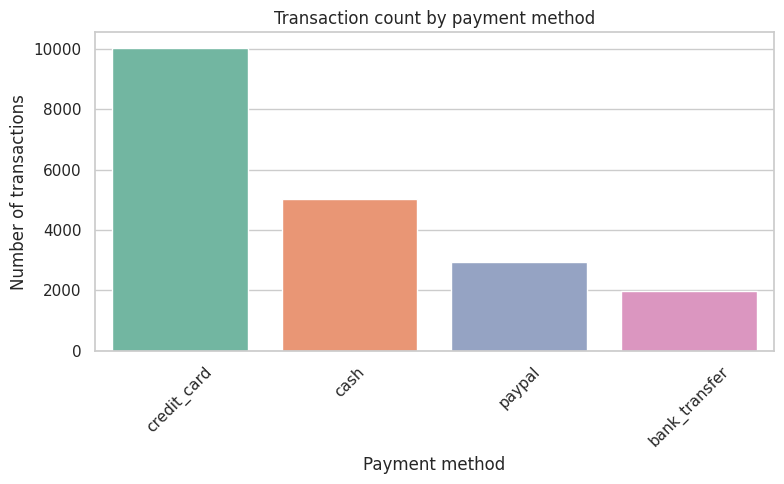

In [24]:
import seaborn as sns
import matplotlib.pyplot as plt

# Set the overall visual style for the plots
sns.set(style='whitegrid')

# Count the number of transactions per payment method and reset index
payment_counts = sales['payment_method'].value_counts().reset_index()
payment_counts.columns = ['payment_method', 'count']  # Rename columns for clarity

# # Initialize the figure and its size
plt.figure(figsize=(8, 5))

# Create a bar plot using Seaborn
sns.barplot(
    data=payment_counts,
    x='payment_method',
    y='count',
    palette='Set2'  # Color palette for visual appeal
)

# Set title and axis labels
plt.title('Transaction count by payment method')
plt.xlabel('Payment method')
plt.ylabel('Number of transactions')

# Rotate x-axis labels for better readability (if needed)
plt.xticks(rotation=45)

# Adjust layout to avoid overlap
plt.tight_layout()

# Display the plot
plt.show()

**What does this chart show?**  
This bar plot displays the number of transactions for each payment method.

**What stands out?**  
Credit card payments clearly dominate, representing more than 50% of all transactions. In contrast, bank transfers account for less than 10%.

**Why is this relevant?**  
The preference for credit cards may indicate customer demand for speed and convenience, and could inform decisions around payment options, promotions, or checkout optimization.

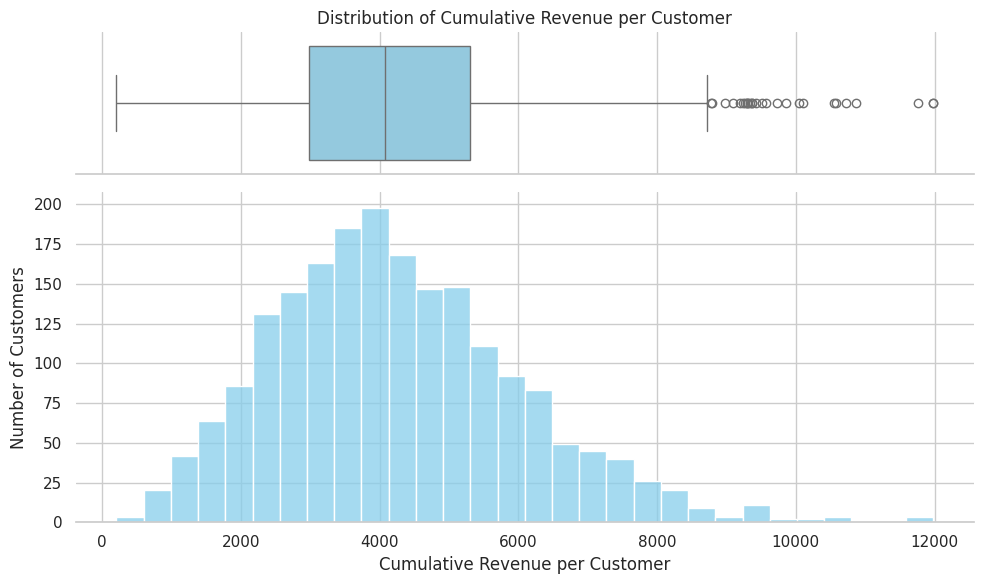

In [25]:
# Group sales by customer and get the maximum cumulative revenue per customer
sales_customers_cum_rev_grouped = sales.groupby('customer_id')['cumulative_revenue_per_customer'].max().sort_values(ascending=False).reset_index()

# Set style
sns.set_theme(style='whitegrid')

# Create subplots: 2 rows, 1 column
fig, (ax_box, ax_hist) = plt.subplots(
    nrows=2,
    sharex=True,
    gridspec_kw={"height_ratios": (0.3, 0.7)},
    figsize=(10, 6)
)

# Boxplot (top)
sns.boxplot(
    x='cumulative_revenue_per_customer',
    data=sales_customers_cum_rev_grouped,
    ax=ax_box,
    color='skyblue'
)
ax_box.set(xlabel='')  # Remove x-axis label on top chart
ax_box.set_title('Distribution of Cumulative Revenue per Customer')

# Histogram (bottom)
sns.histplot(
    x='cumulative_revenue_per_customer',
    data=sales_customers_cum_rev_grouped,
    ax=ax_hist,
    bins=30,
    color='skyblue'
)

# Improve layout
sns.despine(ax=ax_box, left=True)
sns.despine(ax=ax_hist, left=True)
plt.xlabel('Cumulative Revenue per Customer')
plt.ylabel('Number of Customers')
plt.tight_layout()
plt.show()

**What does this chart show?**  
This visualization combines a boxplot and a histogram to show the distribution of cumulative revenue per customer. The boxplot provides statistical indicators such as the median and outliers, while the histogram shows how revenue is distributed across all customers.

**What stands out?**  
Most customers have cumulative revenue concentrated between $2,000 and $6,000, but there is a noticeable tail extending to the right. This indicates a small number of customers generate significantly more revenue — outliers that are clearly visible in both plots.

**Why is this relevant?**  
Understanding revenue distribution helps identify high-value segments and prioritize customer retention efforts. The presence of outliers justifies a deeper look at top spenders.


/tmp/ipykernel_388/2894750552.py:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(


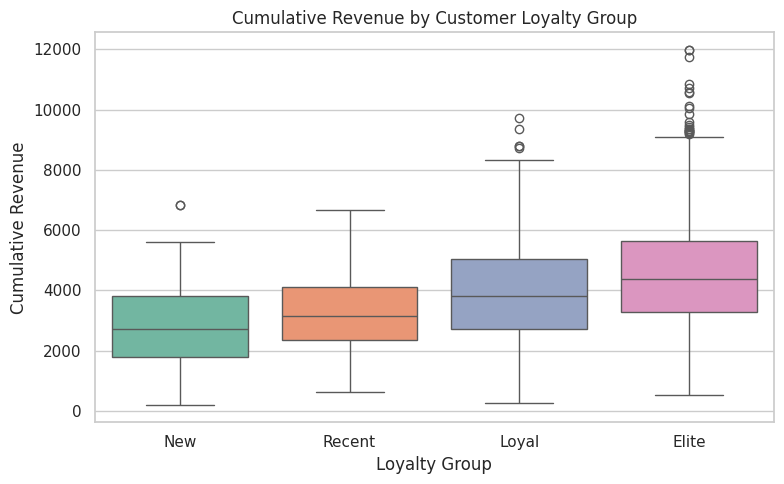

In [26]:
# Group sales by customer and get the maximum cumulative revenue per customer loyal group
customers_loyal_cum_reve = sales.groupby(['customer_id','customer_loyal_group'])['cumulative_revenue_per_customer'].max().sort_values(ascending=False).reset_index()

# Set visual style
sns.set(style='whitegrid')

# Initialize figure
plt.figure(figsize=(8, 5))

# Create boxplot
sns.boxplot(
    data=customers_loyal_cum_reve, 
    x='customer_loyal_group',
    y='cumulative_revenue_per_customer',
    palette='Set2',
    order=['New', 'Recent', 'Loyal', 'Elite'] 
)

# Set titles and labels
plt.title('Cumulative Revenue by Customer Loyalty Group')
plt.xlabel('Loyalty Group')
plt.ylabel('Cumulative Revenue')

# Show the plot
plt.tight_layout()
plt.show()


📈 Cumulative Revenue by Customer Loyalty Group

This boxplot shows how cumulative revenue is distributed across customer loyalty segments — defined based on the number of days since their first purchase.

**What stands out:**

- The median cumulative revenue increases consistently from `New` to `Elite` customers.
- `Loyal` and `Elite` customers not only show higher average revenue, but also a wider spread of values.
- The `Elite` group exhibits a significant number of high-revenue outliers, suggesting that long-term customers are more likely to become top contributors.

**Why it matters:**

This analysis reinforces the importance of long-term customer retention. Not only do loyal customers spend more overall, but the most valuable individuals — the outliers — almost exclusively belong to the `Elite` segment.

/tmp/ipykernel_388/1496843345.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sales_top50_customers['customer_id'] = sales_top50_customers['customer_id'].astype(str)
/tmp/ipykernel_388/1496843345.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sales_top50_customers['customer_id'] = pd.Categorical(
/tmp/ipykernel_388/1496843345.py:24: FutureWarning: 

Setting a gradient palette using color= is deprecated and will be removed in v0.14.0. Set `palette='dark:steelblue'` for the same effect.

  sns.barp

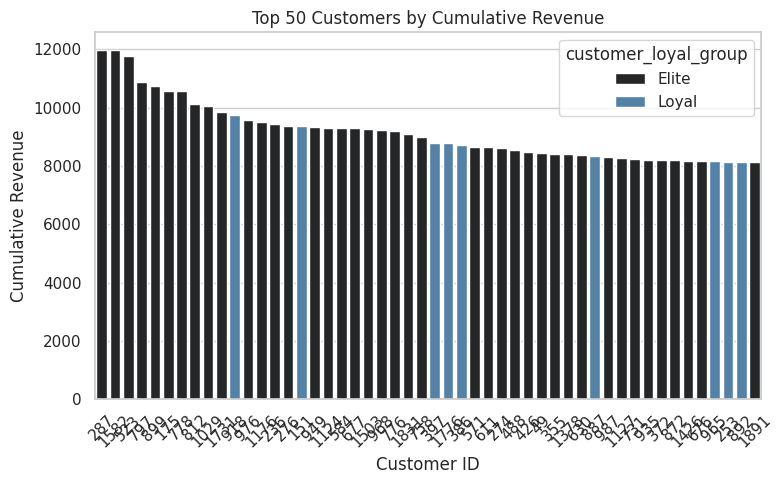

In [27]:
# Select the top 50 customers with the highest cumulative revenue
sales_top50_customers = customers_loyal_cum_reve.head(50) 

# Convert customer_id to string for better readability on the x-axis
sales_top50_customers['customer_id'] = sales_top50_customers['customer_id'].astype(str)

# Set customer_id as an ordered categorical variable to preserve sorting in the bar plot
sales_top50_customers['customer_id'] = pd.Categorical(
    sales_top50_customers['customer_id'],
    categories=sales_top50_customers['customer_id'],
    ordered=True
)

# Set visual style
sns.set(style='whitegrid')
plt.figure(figsize=(8, 5))

# Create the bar plot with a solid blue color
sns.barplot(
    data=sales_top50_customers,
    x='customer_id',
    y='cumulative_revenue_per_customer',
    color='steelblue',
    hue='customer_loyal_group'
)

# Set plot title and labels
plt.title('Top 50 Customers by Cumulative Revenue')
plt.xlabel('Customer ID')
plt.ylabel('Cumulative Revenue')

# Rotate x-axis labels for better readability
plt.xticks(rotation=45)

# Adjust layout to prevent clipping
plt.tight_layout()

# Show the plot
plt.show()

🏅 Top 50 Customers by Cumulative Revenue

This bar chart highlights the 50 customers with the highest cumulative revenue, categorized by their loyalty group.

**What stands out:**

- The `Elite` group dominates the top of the ranking — both in number and revenue levels.
- `Loyal` customers do appear within the Top 50, but tend to cluster toward the lower end of the ranking.
- No `Recent` or `New` customers make it into the top segment, reinforcing the connection between long-term engagement and revenue contribution.

**Why it matters:**

While both `Elite` and `Loyal` customers are valuable, this distribution clearly shows that **the highest value comes from the longest-standing clients**. Retention efforts focused on developing customers from Loyal → Elite could lead to meaningful revenue gains.


In [99]:
# Join sales and customers to check variables like revenue per customers attributes (country, city, gender, etc)
sales_customers_merged = pd.merge(sales, customers[['customer_id','gender','city','country','income_level','customers_cohort']], on='customer_id', how='left')

In [102]:
# Create df to visualize revenue per country, city and customer loyal group
sales_customers_merged_revenue_country = sales_customers_merged.groupby(['country','city','customer_loyal_group'])['total_revenue'].sum().sort_values(ascending=False).reset_index()

# import plotly express to create sunburst visual
import plotly.express as px

# create visual
fig = px.sunburst(
    sales_customers_merged_revenue_country,
    path=['country','city','customer_loyal_group'],
    color='country',
    values='total_revenue',
    color_discrete_sequence=px.colors.qualitative.Set2
)

fig.update_layout(
    title='Customer Revenue Breakdown by Country, City, and Loyalty Group',
    title_x=0.5,
    legend_title_text='Country',
    margin=dict(t=60, l=10, r=10, b=10)
)

fig.show()

### 🔍 Insights from Revenue Distribution by Country, City, and Loyalty Group

The sunburst visualization and detailed breakdown reveal key patterns in customer behavior and geographic revenue generation:

#### 1. 🇺🇸 United States dominates total revenue
- Cities like **Phoenix**, **New York**, and **Chicago** lead the chart with cumulative revenues exceeding **$400,000** each.
- These cities are heavily driven by **Elite** and **Loyal** customers, reinforcing the value of long-term retention.

#### 2. 🇨🇦 Canada and 🇲🇽 Mexico follow with strong performers
- In **Canada**, cities such as **Vancouver**, **Montreal**, and **Ottawa** show consistent revenue from **Elite** customers.
- **Mexico** sees significant contributions from **Monterrey** and **Guadalajara**, with both **Elite** and **Loyal** segments playing a role.

#### 3. 🇨🇴 Surprising distribution in Colombia
- Contrary to expectations, cities like **Cartagena**, **Cali**, and **Barranquilla** outperform more populated areas like Bogotá or Medellín in total revenue.
- This suggests strong localized demand or targeted campaign success in these regions.

#### 4. 🇧🇷 Brazil shows balanced revenue across cities
- Revenue is more evenly spread among cities like **São Paulo**, **Rio de Janeiro**, **Salvador**, and **Brasília**.
- The presence of all loyalty groups (Elite, Loyal, Recent, and New) indicates a healthy mix of customer types.

#### 5. 🏆 Loyalty drives value
- Across nearly all countries, **Elite customers** are responsible for the highest revenue levels.
- As we move from Elite to Loyal, then to Recent and New, revenue per group decreases significantly.
- This highlights the strategic importance of nurturing and retaining high-value customers over time.


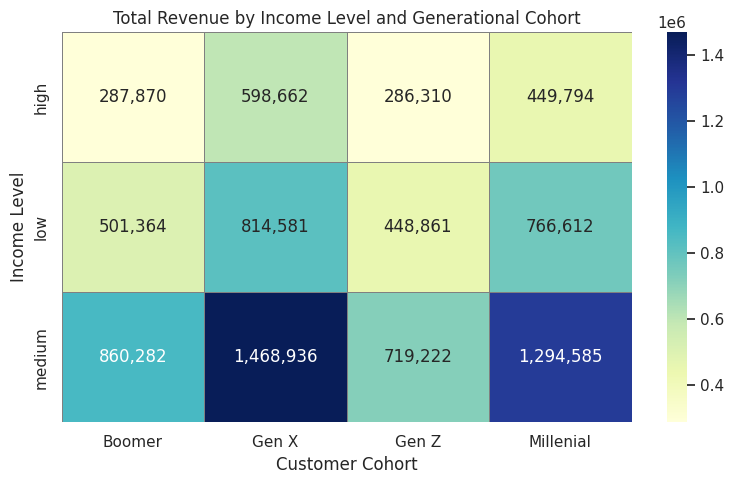

In [189]:
revenue_income_cohort = sales_customers_merged.groupby(['income_level','customers_cohort'])['total_revenue'].sum().sort_values(ascending=False).reset_index()

revenue_income_cohort_pivot = revenue_income_cohort.pivot(
    index='income_level',
    columns='customers_cohort',
    values='total_revenue'
)

sns.set_theme(style='whitegrid')

plt.figure(figsize=(8, 5))

# Capture the heatmap as an Axes object
ax = sns.heatmap(
    revenue_income_cohort_pivot,
    annot=True,
    fmt=".0f",  # Initial formatting (no decimals)
    cmap="YlGnBu",
    linewidths=0.5,
    linecolor='gray'
)

# Loop over the text annotations and apply comma formatting
for text in ax.texts:
    val = text.get_text()
    if val.replace(',', '').isdigit():  # Only format numeric values
        text.set_text(f"{int(val):,}")

# Titles and layout
plt.title('Total Revenue by Income Level and Generational Cohort')
plt.xlabel('Customer Cohort')
plt.ylabel('Income Level')

plt.tight_layout()
plt.show()

### 🔍 Insights: Total Revenue by Income Level and Generational Cohort

- **Medium-income customers dominate revenue generation** across all generational cohorts. They contribute the most in every group, especially:
  - 📌 **Gen X:** $1,468,936  
  - 📌 **Millennials:** $1,294,585  

- **Gen X stands out** as the top-spending cohort overall, with the highest total revenue across all income levels combined.

- Despite being younger, **Gen Z contributes less revenue**, particularly in the high-income group, suggesting they are less engaged or have lower purchasing power.

- The **high-income group contributes the least revenue overall**, which could imply:
  - Fewer customers in this segment,
  - A preference for different channels or brands,
  - Or lower promotional targeting effectiveness.

- **Low-income Millennials** and **low-income Gen X** still generate substantial revenue, hinting at high volume or frequent purchases despite income constraints.


<a style='text-decoration:none;line-height:16px;display:flex;color:#5B5B62;padding:10px;justify-content:end;' href='https://deepnote.com?utm_source=created-in-deepnote-cell&projectId=d3ae251d-9bdf-4aa8-8817-46bba0993e76' target="_blank">
 </img>
Created in <span style='font-weight:600;margin-left:4px;'>Deepnote</span></a>